In [ ]:
! pip install -U imbalanced-learn 
## Install imblearn package as well will be needing that in code

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer as KD
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from collections import Counter
## we need to first download the imblearn package 
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, SVMSMOTE, SMOTENC 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# **Question 1: Load**

*   Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here.

*   Please describe the structure of the data. Number of records and fields in each record?
*   Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.




In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here.

In [ ]:
df = pd.read_json('/content/drive/MyDrive/transactions.txt', lines = True)

Please describe the structure of the data. Number of records and fields in each record?

There are 786363 records in total with 29 columns.

Various Columns in the dataset are --
Columns List = ['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
        'transactionDateTime', 'transactionAmount', 'merchantName',
        'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
        'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
        'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
        'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
        'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
        'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud']

In [ ]:
df.shape, df.columns

((786363, 29),
 Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
        'transactionDateTime', 'transactionAmount', 'merchantName',
        'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
        'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
        'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
        'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
        'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
        'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
       dtype='object'))

Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

We can observe that in this particular dataset the missing values are represented as empty strings therefore, I planned to impute the entries which has missing values Below, I have in detail described the count of Null, NA, and empty strings in the dataset. Also, I have provided the basic statistics of all the columns which are numeric type.

**Analysis-** There are 6 columns [echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises, recurringAuthInd] where all records are empty strings, hence are of no use to us, so I will be dropping those columns from the dataset.

In [ ]:
print("Number of null values in the dataframe \n",df.isnull().sum())
print("Number of NA entries in dataframe: \n", df.isna().sum())
print("Number of empty strings in the dataframe \n",df.eq('').sum())


Number of null values in the dataframe 
 accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64
Number of NA entries in dataframe: 
 accountNumber               0
customerI

In [ ]:
# Basic Statistics for the Transaction dataset
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


Dropping columns where all the records are empty string.

In [ ]:
df_copy = df.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis=1)

# **Question 2: Plot**


*   Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

*   Report any structure you find and any hypotheses you have about that structure.



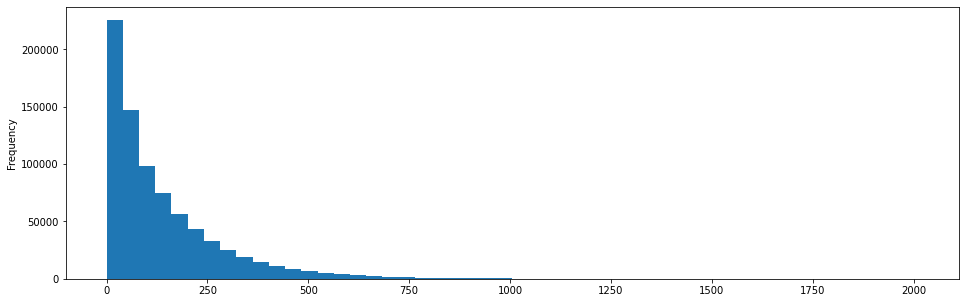

In [ ]:
df_copy['transactionAmount'].plot(kind = 'hist', figsize = (16,5), bins= 50 )

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64


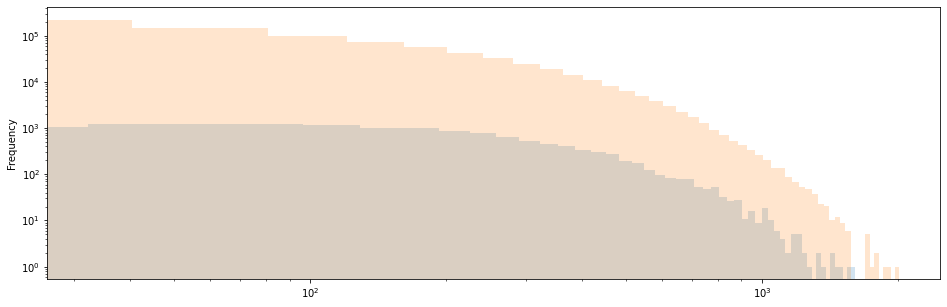

In [ ]:
df_f = df_copy[df_copy.isFraud == True]
df_nf = df_copy[df_copy.isFraud == False]
df_f['transactionAmount'].plot(kind = 'hist', figsize = (16,5), bins= 50, alpha = 0.2, logy = True, logx = True)
df_nf['transactionAmount'].plot(kind = 'hist', figsize = (16,5), bins= 50, alpha = 0.2, logy = True, logx= True)
### Rightly skewed plot for the transactionAmount
print(df_copy.transactionAmount.describe())

Cases where there is Fraud  ----
              isFraud
transBinned         
0.0             1106
1.0             2058
2.0             3455
3.0             5798
Cases where there is NO Fraud  ----
              isFraud
transBinned         
0.0           195412
1.0           194579
2.0           193154
3.0           190801


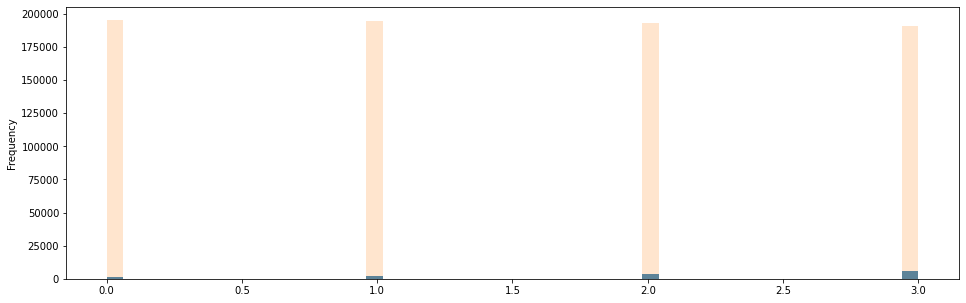

In [ ]:
bin = KD(n_bins=4, encode='ordinal', strategy='quantile')
transBinned = np.array(df_copy['transactionAmount']).reshape(-1,1)
bin.fit(transBinned)
df_copy['transBinned'] = bin.transform(transBinned)
df_f = df_copy[df_copy.isFraud == True]
df_nf = df_copy[df_copy.isFraud == False]
print("Cases where there is Fraud  ----\n",
      df_copy[df_copy.isFraud == True].groupby('transBinned').agg({'isFraud':'count'}))
print("Cases where there is NO Fraud  ----\n",
      df_copy[df_copy.isFraud == False].groupby('transBinned').agg({'isFraud':'count'}))
df_f['transBinned'].plot(kind = 'hist', figsize = (16,5), bins= 50, alpha = 0.9)
df_nf['transBinned'].plot(kind = 'hist', figsize = (16,5), bins= 50, alpha = 0.2)

Report any structure you find and any hypotheses you have about that structure.

-- We observe that the Transaction Amount is rightly skewed as majority of the transactions are between the mean and the first two standard deviatiosn. We will now observe how does the TransactionAmount affects the Fraud vs NonFraud classification. 

**First Plot --** We observe that the plot for the TransactionAmount columns is rightly skewed. As I observed that the transaction is exponential in nature, I plotted another variation to observe the plot in the linear scale along with Fraud and Non Fraud Classes.

**Second Plot --**  We observe the Transaction Amount in a linear scale and observed that both Fraud and Non-Fraud cases are of same nature for the complete set of Transactions. So, I binned the Transaction Amount in 4 bins as per the quantile range and then observe the Fraud and Non-Fraud Classes.

**Third Plot --** I have used KBinsDiscretizer for binning TransactionAmount and observe the class variables. We observed that the Non-Fraud Cases for all 4 bins are significantly similar, but the Fraud Cases are maximum for the 4th bin and minimum for the 1st bin. So, moving forward we will be using the binned value Transaction Amount instead of the real Transaction Amounts as the binned groupings are more descriptive about the nature of variation of Fraud and Non-Fraud cases with respect to the Transaction Amount


# Question 3: Data Wrangling - Duplicate Transactions

You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

*   Can you programmatically identify reversed and multi-swipe transactions?

> For identifying the reversed Transaction, I obsereved that we can filter out the reverse transaction by using TransactionType = 'Reversal'. Also such Transactions also have a 'Purchase' TransactionType as well. And hence I have considered them as duplicate in nature and dropped them.


> For multiswiped transactions, as per my understanding they are usually caused due to the transaction failures, so I have sorted the dataframe on the basis of TransactionDateTime, and then applied grouping on CustomerId, TransactionAmount,and filtered all those transaction which have similar CustomerId, TransactionAmount and have occured within 120seconds after the previous transaction. As the data is sorted by time, I have calculated the time difference and filtered all those Transactions which have occurred within 120 seconds. Since we set True values to the multiSwiped Transactions, so we can filter the dataframe accordingly.


*   What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)

> total number of transactions that are reversed are - 20303 records

> total dollar amount do you estimate for the reversed transactions : 2821792.5

>  total number of transactions that are multiSwiped are - 5188 records

> total dollar amount do you estimate for the multi swiped transactions - 749167.39.

*   Did you find anything interesting about either kind of transaction?

> Both of these kinds of transactions represents noise and duplicacy in our dataset and we will be removing them moving forward, I also observed the distribution of Fraud vs Non-Fraud in both the cases but both of them are significant with numnber of fraud and non-fraud cases




In [ ]:
### Reversed Transactions 
df_reversed = pd.DataFrame(df_copy[df_copy.transactionType == 'REVERSAL'])
i = df_copy[df_copy.transactionType == 'REVERSAL'].index
print("Total dollar amount do you estimate for the reversed transactions\n",df_reversed.transactionAmount.sum())
print("Total number of transactions that are reversed are\n",len(i))
df_copy = df_copy.drop(i)

Total dollar amount do you estimate for the reversed transactions
 2821792.5
Total number of transactions that are reversed are
 20303


In [ ]:
df_copy['transactionDateTime'] = pd.to_datetime(df_copy.transactionDateTime)
df_copy = df_copy.sort_values('transactionDateTime')
df_copy['mutliSwipedTransaction'] = df_copy.groupby(['customerId','transactionAmount']).transactionDateTime.diff().abs().dt.seconds.le(120)


In [ ]:
print("Total dollar amount do you estimate for the multiSwiped transactions\n",df_copy[df_copy.mutliSwipedTransaction == True].transactionAmount.sum())
print("Total number of transactions that are multiSwiped are\n",df_copy.mutliSwipedTransaction.sum())

Total dollar amount do you estimate for the multiSwiped transactions
 749167.39
Total number of transactions that are multiSwiped are
 5188


In [ ]:
## We will bw removing all the transactions which are multiSwiped transactions from our dataset.
df_copy = df_copy[df_copy.mutliSwipedTransaction == False]
df_copy.shape

(760872, 25)

Moving forward with the dataset, we have removed all the records which are duplicate transactions, by duplicacy, we mean the reversed and the multiple swiped transactions are being removed from the dataset and we are left with 760872 records

# **Question 4: Model**
Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

* Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).

* Provide an estimate of performance using an appropriate sample, and show your work.

* Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time

In [ ]:
df_copy.isFraud.sum()/df_copy.shape[0]*100

1.5776635229052982

We can observe that it's a classical Imbalance Problem as the dataset contains only 1.57% records, which has isFraud = True, i.e in the given dataset the dominant class is isFraud = False. 

We will be using various techniques wherein we will be handling the Class Imbalance problem and try to achieve the desired results.

# **Feature Engineering**

We will analyze various features in the dataset and transfrom that accordingly based on the observations

Extracting Features from the data --- transactionDateTime
We tried to observe the effect of transactionDateTime on isFraud.

We observed that we considered 'hour' of transaction. We have plotted both the cases Fraud and Non-Fraud cases.

Observation 1 - We observe that for Non-Fraud the curve is sinosoidal in nature. That is the non fraud cases are consistent with respect to the transaction hour.

Observation 2 - When we observed for cases with Fraud, we see a trend that there are significant more number of Fraud cases from time range of 8-12. 

Assumption - We plan to use the binned value of transactionDateTime i.e [0-23] and move forward with transactionHour Feature instead of transactionDateTime feature.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fcd4efeb8>],
      dtype=object)

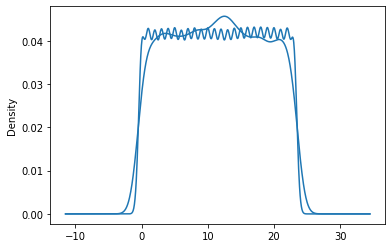

In [ ]:
df_copy['transactionDateTime'] = pd.to_datetime(df_copy.transactionDateTime)
df_copy['transactionHour'] = df_copy.transactionDateTime.dt.hour
df_transHour_f = df_copy[df_copy.isFraud == True]
df_transHour_nf = df_copy[df_copy.isFraud == False]
df_transHour_nf['transactionHour'].plot(kind='density', subplots = (1,2))
df_transHour_f['transactionHour'].plot(kind = 'density', subplots = (2,2))

In [ ]:
## Binning for TransactionDateTime feature
bin = KD(n_bins=5, encode='ordinal', strategy='uniform')
transHour = np.array(df_copy['transactionHour']).reshape(-1,1)
bin.fit(transHour)
df_copy['hourBinned'] = bin.transform(transHour)

**Feature 2 -- Credit Limit**

With Taking CreditLimit into consideration we don't see a significant difference between the Fraud and Non-fraud cases distribution. Both the plots have significant similar spikes. So, I have used credit limit the way it is.

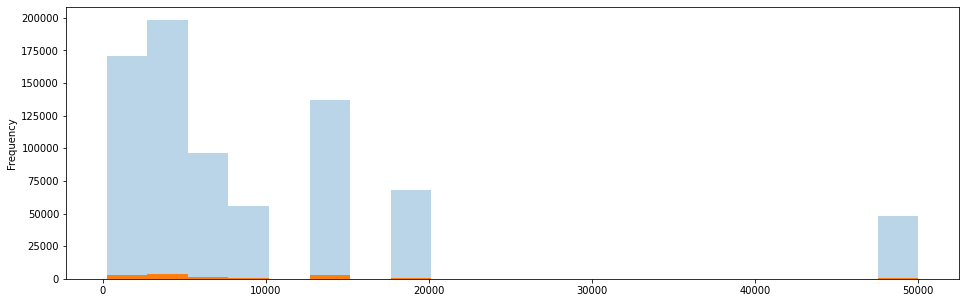

In [ ]:
df_nf['creditLimit'].plot(kind= 'hist', bins = 20, figsize = (16,5), alpha = 0.3)
df_f['creditLimit'].plot(kind= 'hist', bins = 20, figsize = (16,5))

**Feature - Merchant Name and MerchantCategoryCode**

There are 1042 different merchantName and 13 merchant category codes. But we see the top 10 merchants have significantly high number of Fraud cases. Therefore, I have planned to group the merchantName and merchant category code other than the top 10 as 'others' and used them.

In [ ]:
## For merchant Name I plan to  keep the top 10 merchants
temp = df_copy[df_copy.isFraud == True].groupby(by = ['merchantName']).agg({'isFraud':'count'}).sort_values(by = 'isFraud',ascending=False)
print("Merchant Names sorted by isFraud Cases number\n",temp)

d = {}  ## Mapping Dictionary for keep top 10 and rest all map to 'others' as merchantName
for i in temp.index.to_list()[:10]:
  d[i] = i
df_copy['merchantMapped'] = df_copy['merchantName'].apply(lambda x: d.get(x,'others'))

Merchant Names sorted by isFraud Cases number
                       isFraud
merchantName                 
Lyft                      731
ebay.com                  621
Fresh Flowers             538
Uber                      501
walmart.com               427
...                       ...
Quizno's #326636            1
Quizno's #311602            1
Quizno's #235427            1
Quizno's #230127            1
Krispy Kreme #122012        1

[1042 rows x 1 columns]


In [ ]:
temp = df_copy[df_copy.isFraud == True].groupby(by = ['merchantCategoryCode']).agg({'isFraud':'count'}).sort_values(by = 'isFraud',ascending=False)
print("Merchant Category Codes sorted by isFraud Cases number\n",temp)
d = {}
for i in temp.index.to_list()[:10]:
  d[i] = i
df_copy['merchantCategoryMapped'] = df_copy['merchantCategoryCode'].apply(lambda x: d.get(x,'others'))

Merchant Category Codes sorted by isFraud Cases number
                       isFraud
merchantCategoryCode         
online_retail            4779
online_gifts             1554
rideshare                1232
fastfood                 1037
food                      984
entertainment             920
airline                   509
auto                      266
hotels                    244
subscriptions             209
furniture                 100
health                     88
personal care              82


**Feature PurchaseType** -

As we have removed the purchaseType = Reversal, we are left with PURCHASE and ADDRESS_VERIFICATION, as two feature type. However, I observed that there were several empty strings in the purchase_type, so instead of dropping those records and loosing information, I decided to impute empty string with 'others'.              

In [ ]:
temp = df_copy[df_copy.isFraud == True].groupby(by = 'transactionType').agg({'isFraud':'count'}).sort_values(by = 'isFraud',ascending=False)
print(df_copy[df_copy.isFraud == False].groupby(by = 'transactionType').agg({'isFraud':'count'}).sort_values(by = 'isFraud',ascending=False))

#Impute the null values with type = "others"
d = {}
for i in temp.index.to_list()[:10]:
  if i is "":
    d[i] = 'others'
  else:
    d[i] = i
df_copy['transactionType'] = df_copy['transactionType'].apply(lambda x: d.get(x,'others'))

                      isFraud
transactionType              
PURCHASE               728293
ADDRESS_VERIFICATION    19899
                          676


**Feature accountOpenDate and currentExpDate** - 
With an assumption that old cards are more prone to Fraud due to less secure features, I have computed the length of the account instead of using this two features, with an understanding that more the lenght of accound will be, there is a significant chance of a fraudulent case

In [ ]:
df_copy['accountOpenDate']=pd.to_datetime(df_copy['accountOpenDate'])
df_copy['accountOpenDate'] = df_copy.accountOpenDate.dt.year
df_copy['currentExpDate'] = pd.to_datetime(df_copy['currentExpDate'])
df_copy['currentExpDate'] = df_copy.currentExpDate.dt.year
df_copy['accountLenght'] = (df_copy.currentExpDate - df_copy.accountOpenDate)

**Feature cardCVV and enteredCVV** -
I have combined both these features, if there is match I have assigned a True value, otherwise False, assuming that a mismatch in enteredCVV and cardCVV would be more prone to a fraudulent case

In [ ]:
df_copy['CVVMatched'] = np.where(df_copy.loc[:,'cardCVV'] == df_copy.loc[:,'enteredCVV'], 1, 0)

Handling Missing Values - acqCountry, posEntryCode, posConditionCode, merchantCountryCode
There are several entries as empty string in all these cases, so I have replaced empty string with "Others" in case of  acqCountry, merchantCountryCode and in posEntryCode, posConditionCode with a random number

In [ ]:
temp = df_copy[df_copy.isFraud == True].groupby(by = 'acqCountry').agg({'isFraud':'count'}).sort_values(by = 'isFraud',ascending=False)
d = {}
for i in temp.index.to_list():
  if i is "":
    d[i] = 'others'
  else:
    d[i] = i
df_copy['acqCountry'] = df_copy['acqCountry'].apply(lambda x: d.get(x,'others'))

temp = df_copy[df_copy.isFraud == True].groupby(by = 'posEntryMode').agg({'isFraud':'count'}).sort_values(by = 'isFraud',ascending=False)
d = {}
for i in temp.index.to_list():
  if i is "":
    d[i] = '99'
  else:
    d[i] = i
df_copy['posEntryMode'] = df_copy['posEntryMode'].apply(lambda x: d.get(x,'others'))

temp = df_copy[df_copy.isFraud == True].groupby(by = 'posConditionCode').agg({'isFraud':'count'}).sort_values(by = 'isFraud',ascending=False)
d = {}
for i in temp.index.to_list():
  if i is "":
    d[i] = '100'
  else:
    d[i] = i
df_copy['posConditionCode'] = df_copy['posConditionCode'].apply(lambda x: d.get(x,'others'))

temp = df_copy[df_copy.isFraud == True].groupby(by = 'merchantCountryCode').agg({'isFraud':'count'}).sort_values(by = 'isFraud',ascending=False)
d = {}
for i in temp.index.to_list():
  if i is "":
    d[i] = 'others'
  else:
    d[i] = i
df_copy['merchantCountryCode'] = df_copy['merchantCountryCode'].apply(lambda x: d.get(x,'others'))


In [ ]:
df_copy.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transBinned,mutliSwipedTransaction,transactionHour,hourBinned,merchantMapped,merchantCategoryMapped,accountLenght,CVVMatched
640789,419104777,419104777,50000,50000.0,2016-01-01 00:01:02,44.09,Washington Post,US,US,09,01,subscriptions,2028,2015,2015-05-30,837,837,5010,PURCHASE,0.0,False,False,False,1.0,False,0,0.0,others,subscriptions,13,1
28946,674577133,674577133,5000,5000.0,2016-01-01 00:01:44,329.57,staples.com,US,US,09,08,online_retail,2024,2015,2015-08-19,430,430,1693,PURCHASE,0.0,False,False,False,3.0,False,0,0.0,staples.com,online_retail,9,1
222211,958438658,958438658,20000,20000.0,2016-01-01 00:01:47,164.57,cheapfast.com,US,US,05,01,online_retail,2023,2013,2013-07-20,445,445,2062,PURCHASE,0.0,False,False,False,2.0,False,0,0.0,cheapfast.com,online_retail,10,1
470320,851126461,851126461,10000,10000.0,2016-01-01 00:02:04,122.83,discount.com,US,US,02,08,online_retail,2025,2014,2014-10-18,667,667,7359,PURCHASE,0.0,False,False,False,2.0,False,0,0.0,others,online_retail,11,1
704106,148963316,148963316,2500,2500.0,2016-01-01 00:02:19,0.00,Fast Repair,US,US,05,01,auto,2026,2013,2013-12-12,542,542,1785,ADDRESS_VERIFICATION,0.0,False,False,False,0.0,False,0,0.0,others,auto,13,1


Dropping Redundant Columns-- 

We have performed feature engineering for various columns and thus we will be dropping all the columns which are redundant. Also, I plan to drop columns customerID, accountNumber, cardLast4Digits, dateOfLastAddressChange as I believe the features are unique and are significant to differentiate a card but not a particular transaction as fraudulent or non-fraudulent

In [ ]:
df_copy = df_copy.drop(['accountNumber','customerId','cardLast4Digits','dateOfLastAddressChange', 'cardCVV', 'enteredCVV','transactionDateTime','transactionAmount','merchantName','currentExpDate','accountOpenDate','merchantCategoryCode'], axis = 1)

After the Feature Engineering we have following features. Below is the detailed list of all the new feature and there datatypes.

In [ ]:
df_copy.dtypes , df_copy.columns, df_copy.shape

(creditLimit                   int64
 availableMoney              float64
 acqCountry                   object
 merchantCountryCode          object
 posEntryMode                 object
 posConditionCode             object
 transactionType              object
 currentBalance              float64
 cardPresent                    bool
 expirationDateKeyInMatch       bool
 isFraud                        bool
 transBinned                 float64
 mutliSwipedTransaction         bool
 transactionHour               int64
 hourBinned                  float64
 merchantMapped               object
 merchantCategoryMapped       object
 accountLenght                 int64
 CVVMatched                    int64
 dtype: object,
 Index(['creditLimit', 'availableMoney', 'acqCountry', 'merchantCountryCode',
        'posEntryMode', 'posConditionCode', 'transactionType', 'currentBalance',
        'cardPresent', 'expirationDateKeyInMatch', 'isFraud', 'transBinned',
        'mutliSwipedTransaction', 'transactio

In [ ]:
df_copy.head()

,creditLimit,availableMoney,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transBinned,mutliSwipedTransaction,transactionHour,hourBinned,merchantMapped,merchantCategoryMapped,accountLenght,CVVMatched
640789,50000,50000.0,US,US,09,01,PURCHASE,0.0,False,False,False,1.0,False,0,0.0,others,subscriptions,13,1
28946,5000,5000.0,US,US,09,08,PURCHASE,0.0,False,False,False,3.0,False,0,0.0,staples.com,online_retail,9,1
222211,20000,20000.0,US,US,05,01,PURCHASE,0.0,False,False,False,2.0,False,0,0.0,cheapfast.com,online_retail,10,1
470320,10000,10000.0,US,US,02,08,PURCHASE,0.0,False,False,False,2.0,False,0,0.0,others,online_retail,11,1
704106,2500,2500.0,US,US,05,01,ADDRESS_VERIFICATION,0.0,False,False,False,0.0,False,0,0.0,others,auto,13,1


# **Label Encoding Features of Type 'object'**

I used label encoding for converting the features of 'object' type to int64 type to make the features compatible to be given as an input in the model.

In [ ]:
labelencoder = LabelEncoder()
df_encode = pd.DataFrame({ 'acqCountry': df_copy.acqCountry,
                          'merchantCountryCode': df_copy.merchantCountryCode,
                          'posEntryMode':df_copy.posEntryMode,
                          'posConditionCode':df_copy.posConditionCode,
                          'transactionType':df_copy.transactionType,
                          'cardPresent':df_copy.cardPresent,
                          'expirationDateKeyInMatch':df_copy.expirationDateKeyInMatch,
                          'merchantMapped':df_copy.merchantMapped,
                          'merchantCategoryMapped':df_copy.merchantCategoryMapped,
                          'isFraud':df_copy.isFraud
    
})
df_encode = df_encode.apply(LabelEncoder().fit_transform)



In [ ]:
temp = pd.DataFrame({ 'availableMoney': df_copy.availableMoney,
                          'creditLimit':df_copy.creditLimit,
                          'currentBalance': df_copy.currentBalance,
                          'transactionHour':df_copy.transactionHour,
                          'transBinned':df_copy.transBinned,
                          'accountLenght':df_copy.accountLenght,
                          'CVVMatched':df_copy.CVVMatched
  
})
df_encode = df_encode.join(temp)

In [ ]:
df_encode.head()

,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,transactionType,cardPresent,expirationDateKeyInMatch,merchantMapped,merchantCategoryMapped,isFraud,availableMoney,creditLimit,currentBalance,transactionHour,transBinned,accountLenght,CVVMatched
640789,3,3,2,0,1,0,0,7,10,0,50000.0,50000,0.0,0,1.0,13,1
28946,3,3,2,1,1,0,0,9,7,0,5000.0,5000,0.0,0,3.0,9,1
222211,3,3,1,0,1,0,0,4,7,0,20000.0,20000,0.0,0,2.0,10,1
470320,3,3,0,1,1,0,0,7,7,0,10000.0,10000,0.0,0,2.0,11,1
704106,3,3,1,0,0,0,0,7,1,0,2500.0,2500,0.0,0,0.0,13,1


# **Splitting the dataset**

We have splitted the dataset into train data and test data.

The test size, I have used it 30%.

Also, I have used the stratification strategy so that percent of isFraud class remains consistent in both the train as well as the test dataset.

In [ ]:
y = df_encode.loc[:,'isFraud']
df_encode_copy = df_encode.drop(['isFraud'], axis = 1)
X = df_encode_copy
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify= y, test_size=0.30, random_state=42)
print(X_train.shape,y_train.shape)
print(X_val.shape, y_val.shape)
X_train = X_train.reset_index(drop =True)
y_train = y_train.reset_index(drop = True)
X_val = X_val.reset_index(drop = True)
y_val = y_val.reset_index(drop = True)
X_train


(532610, 16) (532610,)
(228262, 16) (228262,)


,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,transactionType,cardPresent,expirationDateKeyInMatch,merchantMapped,merchantCategoryMapped,availableMoney,creditLimit,currentBalance,transactionHour,transBinned,accountLenght,CVVMatched
0,3,3,1,3,1,1,0,7,8,5721.62,7500,1778.38,12,3.0,15,1
1,3,3,1,0,1,1,0,7,10,2406.30,2500,93.70,7,3.0,16,1
2,3,3,2,0,0,0,0,7,7,373.55,500,126.45,9,0.0,14,1
3,3,3,2,0,1,1,0,7,2,4891.51,15000,10108.49,4,3.0,10,1
4,3,3,2,1,1,0,0,7,10,180.18,500,319.82,17,1.0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532605,3,3,1,0,1,0,0,4,7,11447.24,15000,3552.76,12,2.0,18,1
532606,3,3,2,1,1,1,0,7,2,674.43,5000,4325.57,11,3.0,9,1
532607,3,3,2,0,1,0,0,7,3,654.59,2500,1845.41,3,1.0,11,1
532608,3,3,2,0,1,1,0,7,2,3310.15,5000,1689.85,18,0.0,5,1


# **Baseline Classification Model**

I have used typically two standard classification model.


1.   Logistic Regression
2.   Random Forest

Our goal is to predict the isFraud class, and we will observe the classification reports to evaluate our results.

In [ ]:
def random_forest(train_x, train_y,test_x, test_y):
  clf = RandomForestClassifier(n_estimators = 10, max_depth = 10, random_state=0)
  clf.fit(train_x,train_y)
  print(classification_report(test_y, clf.predict(test_x)))
  print(confusion_matrix(test_y, clf.predict(test_x)))

In [ ]:
print(random_forest(X, y, X_val, y_val))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    224661
           1       1.00      0.00      0.01      3601

    accuracy                           0.98    228262
   macro avg       0.99      0.50      0.50    228262
weighted avg       0.98      0.98      0.98    228262

[[224661      0]
 [  3588     13]]
None


In [ ]:
# fit a logistic regression model to the data
def logistic_regression(train_x, train_y,test_x, test_y):
  model = LogisticRegression(max_iter = 120, random_state= 42, class_weight='auto')
  model.fit(train_x, train_y)
  print(model)
  # make predictions
  expected = test_y
  predicted = model.predict(test_x)
  # summarize the fit of the model
  print(classification_report(expected, predicted))
  print(confusion_matrix(expected, predicted))

In [ ]:
print(logistic_regression(X, y, X_val, y_val))

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    224661
           1       0.00      0.00      0.00      3601

    accuracy                           0.98    228262
   macro avg       0.49      0.50      0.50    228262
weighted avg       0.97      0.98      0.98    228262

[[224661      0]
 [  3601      0]]
None


From the above two models we observe the following,



1.   Accuracy - For both the models, we have 0.98 as accuracy, but since we know that our class variable is highly imbalanced we can't use accuracy as the evaluation metrics.
2.   Observing the confusion matrix, we see that in Random Forest, we get True Negatives, that is a fraud transaction is missclassified as non-fraud and the number is 3588 and in LR we get 0. In Fraud Detection, our goal is to either correctly maximize the prediction of Fraud Cases or either we try to reduce the True Negatives.

**Observation**

We will be using Random Forest as the BASELINE Model, and try to reduce the True Negatives that is try to increase the Recall in our case. In Case of Fraud Detection, Recall will be priortized over Precision as if we missclassify, a fraud transaction as non-fraud it can cause heavy loss to a consumer. Therefore,our goal is to maximize recall or either rigtly classify the fraud transaction


**For Solving the Imbalance Problem in the dataset **

We try to use oversample our non-dominant class using SMOTE [Synthetic Minority Oversampling Technique] strategy.
SMOTE works by utilizing a k-nearest neighbor algorithm to create synthetic data. SMOTE first start by choosing random data from the minority class, then k-nearest neighbors from the data are set. Synthetic data would then made between the random data and the randomly selected k-nearest neighbor.

WE will be using the SMOTE strategy and perform oversampling in our dataset, so that both the number of fraud and non-fraud cases are same, and then try to run the Random Forest and observe the classification reports.

In [ ]:
# Borderline SMOTE for Oversampling the X,y
def border_smote(X_train,y_train,X_val,y_val):
  bsmote = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
  X_oversample, y_oversample = bsmote.fit_resample(X_train, y_train)
  return X_oversample, y_oversample


In [ ]:
X_oversample, y_oversample = border_smote(X_train,y_train,X_val,y_val)
print(random_forest(X_oversample, y_oversample, X_val, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.96      0.97    224661
           1       0.07      0.18      0.10      3601

    accuracy                           0.95    228262
   macro avg       0.53      0.57      0.54    228262
weighted avg       0.97      0.95      0.96    228262

[[216126   8535]
 [  2942    659]]
None


Results after Oversamling from BorderlineSMOTE, we significantly reduced the the number of True Negatives as they were 3588 earlier, with BaseLine Random Forest which changed to 2942 with SMote-RandomForest. Also, we see a significant increase in correctly classified Fraudulent cases which changed from 13 to 659. 

We can say that, this oversampling technique did show some significant result as we see that recall 0.0 increased to 0.18, which is a significant result given the imbalance in the dataset.



*   **Conclusion**


> The dataset is a typical classification problem with class Imbalance. The baseline model Random Forest gave poor results, as there are very less records for IsFraud class. But, after applying the oversampling with SMOTE, we observe a significant increase in the correct prediction of Fraud as well as the increase in Recall. 

> We are here analyzing the Recall metrics as in Fraud Detection, we can't ignore the case when a Fraud transaction is missclassified as non-fraud, as that can incur huge amount of loss and customer dissatisfaction as well.

> Therefore, we plan to keep the True Negatives low and thus work on the recall metrics, and thus recall and F1 score is used as our evaluation metrics.

> I was significantly able to improve upon the Baseline Model as recall and F1 score for BaselineModel was 0.0 and with SMOTE-RandomForest we were able to achieve, significantly 0.18 as recall and 0.10 and F1 score. There was a significant improvent in the Confusion metrics as well, as compared to the baseline as in Baseline were able to predict only 13 Fraud cases correctly, whereas in SMOTE-RandomForest we were able to correctly classify 659 Fraud Cases correctly.



*   **Future Work**


> We know that our dataset contains a lot of columns of type 'object', we can perform statistical tests like chi-square analysis for those columns. WE can then formulate various bins and use those columns more significantly.

> In transactional dataset, we can observe the information values and weight of evidences for various columns with respect to the class variable and perform appropriate feature engineering, I think that would be very helpful for better results.

> Modeling -- We could also use One-class SVM basically treating the problem as an anomaly-detection problem i.e an unsupervised problem and train our model only with only the non-fraud class. We can then perform classification over the test data. We will observe that all the fraud transactions will be then considered as an outlier and model will have the better ability to correctly classify them.

> Weighted SVM model by assigning more weight to the less-dominant class, can also help for better classification results.






